# Clasificación de las hojas de mango

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

## Lectura de los datos

In [2]:
data2 = tf.keras.utils.image_dataset_from_directory("../data/", batch_size=1)

Found 4000 files belonging to 8 classes.


In [3]:
import numpy as np

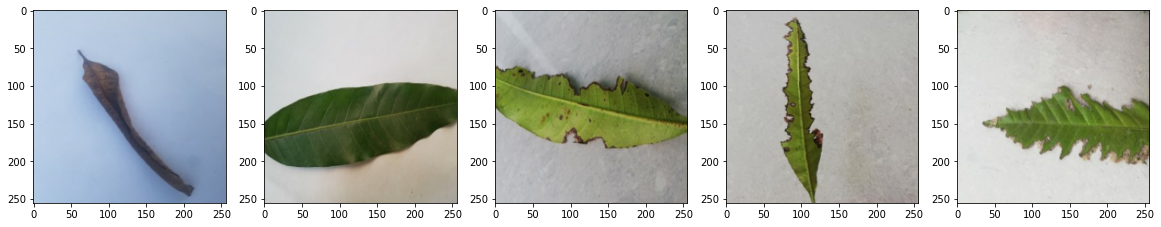

In [4]:
plt.figure(figsize = (20,20))
for i, (imagen, label) in enumerate(data2.take(5)):
    plt.subplot(1,5, i+1)
    plt.imshow(imagen[0]/255)

In [5]:
numbers = ([1,5], [2, 3])
result = map(lambda x:[x[0]+ x[1]] , numbers)
print(list(result))

[[6], [5]]


In [6]:
x = []
y = []

for imagen, etiqueta in data2:
    imagen = tf.reshape(imagen, (256,256,3))
    x.append(imagen)
    y.append(etiqueta)

In [7]:
x = np.array(x)

In [8]:
x.shape

(4000, 256, 256, 3)

In [9]:
y[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([3])>

In [10]:
x[0].shape

(256, 256, 3)

In [11]:
len(np.unique(y))

8

In [12]:
layers_dropout = [keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = x[0].shape), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(64, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(128, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Dropout(0.5),
          keras.layers.Flatten(),
          keras.layers.Dense(250, activation = "relu"),
          keras.layers.Dense(len(np.unique(y)), "sigmoid")
          ]
layers_nodropout = [keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = x[0].shape), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(64, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(128, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Flatten(),
          keras.layers.Dense(250, activation = "relu"),
          keras.layers.Dense(len(np.unique(y)), "sigmoid")
          ]

In [213]:
modelo1 = keras.models.Sequential(layers_dropout)
modelo2 = keras.models.Sequential(layers_nodropout)

In [214]:
modelo1.compile(optimizer = "adam", 
                loss = "sparse_categorical_crossentropy", 
                metrics =["accuracy"])
modelo2.compile(optimizer = "adam", 
                loss = "sparse_categorical_crossentropy", 
                metrics =["accuracy"])

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=2)

In [220]:
history1 = modelo1.fit(xtrain, np.array(ytrain), epochs = 10, validation_split = 0.15)

Epoch 1/10
85/85 [==============================] - 143s 2s/step - loss: 0.1685 - accuracy: 0.9563 - val_loss: 1.8492 - val_accuracy: 0.6542
Epoch 2/10
85/85 [==============================] - 130s 2s/step - loss: 0.1574 - accuracy: 0.9537 - val_loss: 1.7495 - val_accuracy: 0.6604
Epoch 3/10
85/85 [==============================] - 127s 1s/step - loss: 0.1183 - accuracy: 0.9665 - val_loss: 1.8723 - val_accuracy: 0.6771
Epoch 4/10
85/85 [==============================] - 129s 2s/step - loss: 0.7705 - accuracy: 0.8904 - val_loss: 2.0122 - val_accuracy: 0.6208
Epoch 5/10
85/85 [==============================] - 128s 2s/step - loss: 0.2300 - accuracy: 0.9379 - val_loss: 1.7219 - val_accuracy: 0.6604
Epoch 6/10
85/85 [==============================] - 134s 2s/step - loss: 0.1291 - accuracy: 0.9636 - val_loss: 1.7825 - val_accuracy: 0.6375
Epoch 7/10
85/85 [==============================] - 124s 1s/step - loss: 0.1032 - accuracy: 0.9699 - val_loss: 1.9773 - val_accuracy: 0.6542
Epoch 8/10
85

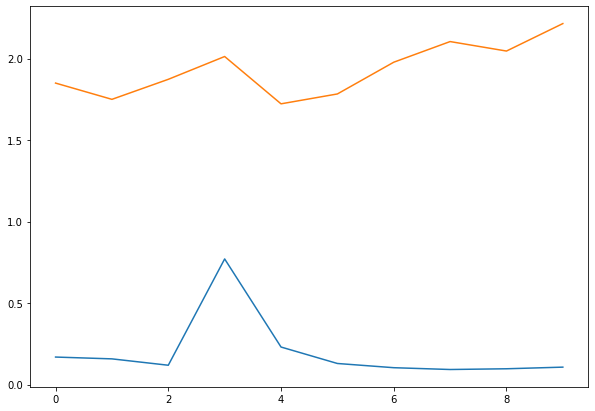

In [231]:
plt.figure(figsize = (10,7))
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])

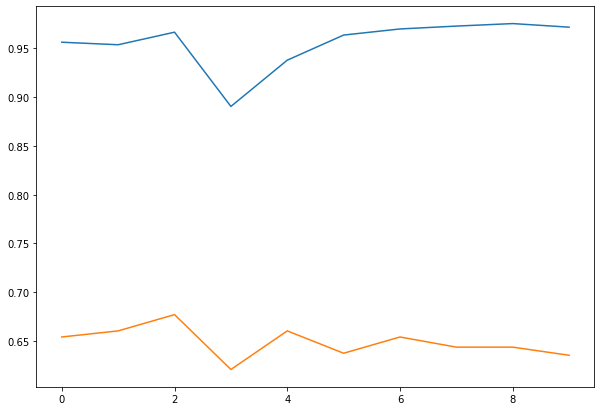

In [236]:
plt.figure(figsize = (10,7))
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])

In [221]:
history2 = modelo2.fit(xtrain, np.array(ytrain), epochs = 10, validation_split = 0.15)

Epoch 1/10
85/85 [==============================] - 129s 2s/step - loss: 0.0623 - accuracy: 0.9882 - val_loss: 3.6971 - val_accuracy: 0.4896
Epoch 2/10
85/85 [==============================] - 125s 1s/step - loss: 0.0649 - accuracy: 0.9886 - val_loss: 3.4302 - val_accuracy: 0.4771
Epoch 3/10
85/85 [==============================] - 125s 1s/step - loss: 0.0451 - accuracy: 0.9912 - val_loss: 3.6327 - val_accuracy: 0.4896
Epoch 4/10
85/85 [==============================] - 125s 1s/step - loss: 0.0270 - accuracy: 0.9930 - val_loss: 4.4998 - val_accuracy: 0.4958
Epoch 5/10
85/85 [==============================] - 127s 1s/step - loss: 0.0100 - accuracy: 0.9982 - val_loss: 4.3413 - val_accuracy: 0.5000
Epoch 6/10
85/85 [==============================] - 126s 1s/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 4.2499 - val_accuracy: 0.5000
Epoch 7/10
85/85 [==============================] - 124s 1s/step - loss: 0.2742 - accuracy: 0.9320 - val_loss: 3.7426 - val_accuracy: 0.4688
Epoch 8/10
85

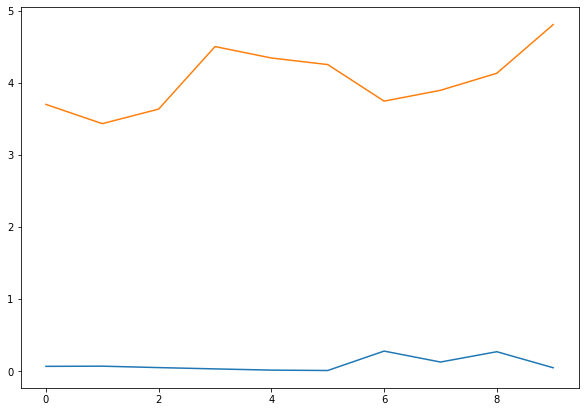

In [237]:
plt.figure(figsize = (10,7))
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])

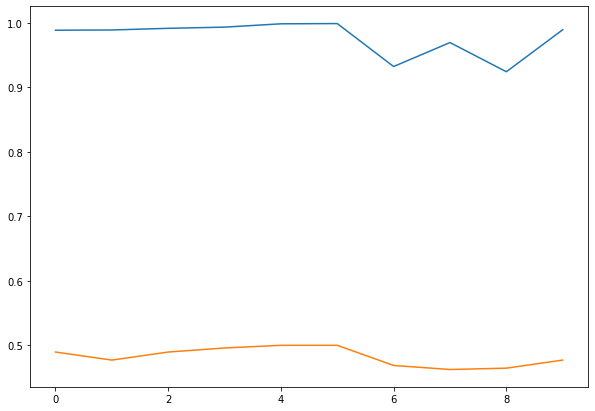

In [238]:
plt.figure(figsize = (10,7))
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])

## Aumento de datos

In [15]:
xtrain, xval, ytrain, yval = train_test_split(xtest,ytest, test_size = 0.2, shuffle = True, random_state=2)

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 15,
    shear_range = 0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow(
    xtrain, 
    ytrain,
    batch_size=32
)
val_generator = train_datagen.flow(
    xtrain, 
    ytrain,
    batch_size=32
)


In [17]:
modelo1 = keras.models.Sequential(layers_dropout)

In [ ]:
modelo1.compile(optimizer = "adam", 
                loss = "sparse_categorical_crossentropy", 
                metrics =["accuracy"])

In [284]:
history1 = modelo1.fit(train_generator, epochs = 10, validation_data=val_generator)

Epoch 1/10
20/20 [==============================] - 50s 2s/step - loss: 0.5162 - accuracy: 0.1250 - val_loss: 0.3930 - val_accuracy: 0.1031
Epoch 2/10
20/20 [==============================] - 52s 3s/step - loss: 0.4182 - accuracy: 0.1219 - val_loss: 0.3862 - val_accuracy: 0.1344
Epoch 3/10
20/20 [==============================] - 45s 2s/step - loss: 0.3888 - accuracy: 0.1203 - val_loss: 0.3607 - val_accuracy: 0.1141
Epoch 4/10
20/20 [==============================] - 51s 3s/step - loss: 0.4062 - accuracy: 0.1250 - val_loss: 0.3525 - val_accuracy: 0.1203
Epoch 5/10
20/20 [==============================] - 50s 3s/step - loss: 0.3739 - accuracy: 0.1250 - val_loss: 0.2993 - val_accuracy: 0.1109
Epoch 6/10
20/20 [==============================] - 45s 2s/step - loss: 0.3166 - accuracy: 0.1219 - val_loss: 0.2629 - val_accuracy: 0.1141
Epoch 7/10
20/20 [==============================] - 45s 2s/step - loss: 0.3038 - accuracy: 0.1172 - val_loss: 0.2810 - val_accuracy: 0.1422
Epoch 8/10
20/20 [==

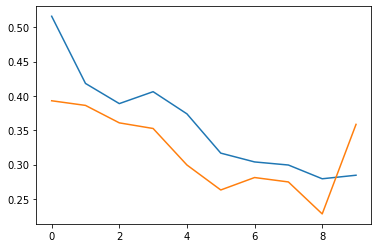

In [285]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])

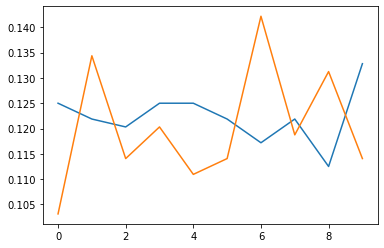

In [286]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])

## Otro Modelo

In [18]:
layers_dropout = [keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = x[0].shape), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(64, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(256, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(512, (4,4), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(256, (5,5), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Dropout(0.5),
          keras.layers.Flatten(),
          keras.layers.Dense(250, activation = "relu"),
          keras.layers.Dense(180, activation = "relu"),
          keras.layers.Dense(150, activation = "relu"),
          keras.layers.Dense(300, activation = "relu"),
          keras.layers.Dense(len(np.unique(y)), "sigmoid")
          ]

In [19]:
modelo3 = keras.models.Sequential(layers_dropout)

In [20]:
modelo3.compile(optimizer = "adam", 
                loss = "sparse_categorical_crossentropy", 
                metrics =["accuracy"])

In [21]:
history3 = modelo3.fit(train_generator, epochs = 10, validation_data=val_generator, batch_size=32)

Epoch 1/10
20/20 [==============================] - 97s 5s/step - loss: 2.0874 - accuracy: 0.0000e+00 - val_loss: 2.0157 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 1.8865 - accuracy: 0.0000e+00

KeyboardInterrupt: 